<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Arabic Sentiment Reviews</p></b></h1>

### Tabel of Contents:

* [Import Libraries](#1)
* [Load Dataset](#2)
* [Bert Model](#4)
* [Evaluation](#3)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
!pip install --upgrade transformers wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 93.2 MB/s eta 0:00:00
  Attempting uninstall: wandb
    Found existing installation: wandb 0.17.7
    Uninstalling wandb-0.17.7:
      Successfully uninstalled wandb-0.17.7
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.0
    Uninstalling transformers-4.44.0:
      Successfully uninstalled transformers-4.44.0


In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np
import torch 
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification,DataCollatorWithPadding
from transformers import Trainer, TrainingArguments
import transformers
from datasets import Dataset, DatasetDict
import wandb
wandb.init(mode="disabled")
import warnings
warnings.filterwarnings('ignore')

wandb: WARNING Disabling the wandb service is deprecated as of version 0.18.0 and will be removed in future versions. 


**<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [3]:
dataset = pd.read_csv('/kaggle/input/330k-arabic-sentiment-reviews/arabic_sentiment_reviews.csv')
dataset = dataset.rename(columns={"content": "text"})
dataset.head()

,label,text
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دا...
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من الن...
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط...
3,0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، ...
4,1,Pop for Girls and Girly Boys ، والأشخاص الذين ...


In [4]:
def clean_arabic_text(text):
    # Remove non-Arabic alphabetic characters and extra whitespace
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)  # Keeps only Arabic characters and spaces
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text
#dataset.text = dataset.text.apply(clean_arabic_text)
dataset.head()

,label,text
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دا...
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من الن...
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط...
3,0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، ...
4,1,Pop for Girls and Girly Boys ، والأشخاص الذين ...


In [5]:
dataset = Dataset.from_pandas(dataset)
dataset

Dataset({
    features: ['label', 'text'],
    num_rows: 330000
})

**<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Bert Model</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [6]:
model_name = "ahmed792002/arabic_sentiment_reviews" 
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [7]:
def preprocess_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)
encoded_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/330000 [00:00<?, ? examples/s]

In [8]:
dataset_size = len(encoded_dataset)
train_size = int(0.20 * dataset_size)  # 30% for training
valid_size = int(0.01 * dataset_size)  # 1% for validation
test_size = int(0.01 * dataset_size)   # 1% for testing

shuffled_dataset = encoded_dataset.shuffle(seed=42)

# Select 30% for training
train_dataset = shuffled_dataset.select(range(train_size))

# Select 1% for validation (next segment after training set)
valid_dataset = shuffled_dataset.select(range(train_size, train_size + valid_size))

# Select 1% for testing (remaining segment)
test_dataset = shuffled_dataset.select(range(train_size + valid_size, train_size + valid_size + test_size))

In [9]:
test_dataset

Dataset({
    features: ['label', 'text', 'input_ids', 'attention_mask'],
    num_rows: 3300
})

In [10]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = torch.argmax(torch.tensor(predictions), dim=1)
    accuracy = accuracy_score(labels, predictions)
    return {"accuracy": accuracy}
training_args = TrainingArguments(
    output_dir="./arabic_sentiment_reviews",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
)


In [11]:
trainer.train()
trainer.save_model()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.370000,0.368638,0.854848
2,0.315400,0.446027,0.866364
3,0.270200,0.508334,0.876667
4,0.221500,0.507457,0.886364
5,0.158700,0.581173,0.887576


**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Evaluation</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [12]:
results = trainer.evaluate(test_dataset)
print("Evaluation results:", results)

Evaluation results: {'eval_loss': 0.5284932255744934, 'eval_accuracy': 0.8930303030303031, 'eval_runtime': 31.9718, 'eval_samples_per_second': 103.216, 'eval_steps_per_second': 12.918, 'epoch': 5.0}


In [13]:
y_pred_prob = trainer.predict(test_dataset).predictions
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.array(test_dataset['label'])

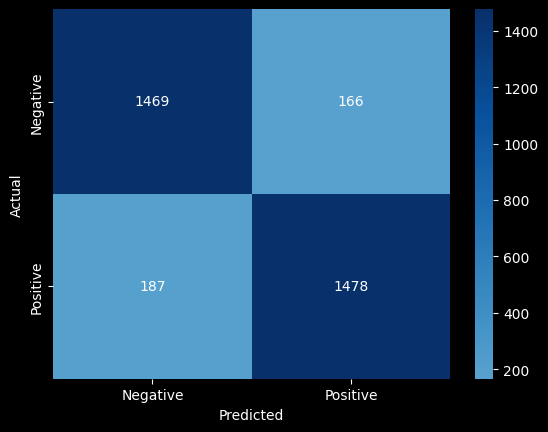

array([[1469,  166],
       [ 187, 1478]])

In [14]:
CM = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']
plt.style.use('dark_background')
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
CM

In [15]:
ClassificationReport = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report is : ', ClassificationReport) 

Classification Report is :                precision    recall  f1-score   support

    Negative       0.89      0.90      0.89      1635
    Positive       0.90      0.89      0.89      1665

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300



**<a id="6"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>